In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


from sklearn.datasets import fetch_openml

import torch
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data.sampler import  SubsetRandomSampler  #for validation test
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.autograd import Variable

In [2]:
def get_fc(inp_dim, out_dim, non_linear='relu'):
    """
    Mid-level API. It is useful to customize your own for large code repo.
    :param inp_dim: int, intput dimension
    :param out_dim: int, output dimension
    :param non_linear: str, 'relu', 'softmax'
    :return: list of layers [FC(inp_dim, out_dim), (non linear layer)]
    """
    layers = []
    layers.append(nn.Linear(inp_dim, out_dim))
    if non_linear == 'relu':
        layers.append(nn.ReLU())
    elif non_linear == 'softmax':
        layers.append(nn.Softmax(dim=1))
    elif non_linear == 'none':
        pass
    else:
        raise NotImplementedError
    return layers

In [3]:
class SimpleCNN(nn.Module):
    """
    Model definition
    """
    def __init__(self, num_classes=10, inp_size=28, c_dim=1):
        super().__init__()
        self.num_classes = num_classes
        #add layer one by one -- one way to add layers
        self.conv1 = nn.Conv2d(c_dim, 32, 5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, 5, padding=2)
        self.nonlinear = nn.ReLU(inplace = False)                
        self.pool1 = nn.AvgPool2d(2, 2)
        self.pool2 = nn.AvgPool2d(2, 2)

        self.flat_dim = int((inp_size*inp_size*64)/16)
        self.fc1 = nn.Sequential(*get_fc(self.flat_dim, 128, 'relu'))
        self.fc2 = nn.Sequential(*get_fc(128, num_classes, 'none'))

    def forward(self, x):
        """
        :param x: input image in shape of (N, C, H, W)
        :return: out: classification logits in shape of (N, Nc)
        """
        N = x.size(0)        
        x = self.conv1(x)        
        x = self.nonlinear(x)        
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.nonlinear(x)
        x = self.pool2(x)

        #check the dimension of input here
       # print("size",x.shape)
        flat_x = x.view(N,self.flat_dim)
        out = self.fc1(flat_x)
        out = self.fc2(out)   
        
        return out

In [4]:
class FMNISTDatapy(Dataset):

    def __init__(self,x_data,y_data, train=True):
        #x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=4)
        
       
        if train:
        #print(np.max(x_data))
        #print(np.max(y_data))
            self.x_data, self.y_data = torch.from_numpy(x_data), torch.from_numpy(y_data)
            print(type(self.x_data))
            print(len(self.x_data))
        else:
            self.x_data, self.y_data = torch.from_numpy(x_data), torch.from_numpy(y_data)

    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, i):
        return self.x_data[i], self.y_data[i]

In [5]:
fmnist_data = fetch_openml(name ="Fashion-MNIST")
fmnistData = fmnist_data.data.to_numpy()
fmnistTarget = fmnist_data.target.to_numpy()
#fmnistTarget = np.expand_dims(fmnistTarget, axis = 1)
fmnistTarget = fmnistTarget.astype(int)


In [6]:
label0 = []
label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
label6 = []
label7 = []
label8 = []
label9 = []
for i in range(len(fmnistTarget)):
    if fmnistTarget[i] == 0:
        label0.append(fmnistData[i])
    elif fmnistTarget[i] == 1:
        label1.append(fmnistData[i])
    elif fmnistTarget[i] == 2:
        label2.append(fmnistData[i])
    elif fmnistTarget[i] == 3:
        label3.append(fmnistData[i])
    elif fmnistTarget[i] == 4:
        label4.append(fmnistData[i])
    elif fmnistTarget[i] == 5:
        label5.append(fmnistData[i])
    elif fmnistTarget[i] == 6:
        label6.append(fmnistData[i])
    elif fmnistTarget[i] == 7:
        label7.append(fmnistData[i])
    elif fmnistTarget[i] == 8:
        label8.append(fmnistData[i])
    else:
        label9.append(fmnistData[i])

In [7]:
label0 = np.array(label0)
label1 = np.array(label1)
label2 = np.array(label2)
label3 = np.array(label3)
label4 = np.array(label4)
label5 = np.array(label5)
label6 = np.array(label6)
label7 = np.array(label7)
label8 = np.array(label8)
label9 = np.array(label9)

In [8]:
label0 = np.concatenate((label0, np.full((len(label0),1),0)), axis=1)
label1 = np.concatenate((label1, np.full((len(label1),1),1)), axis=1)
label2 = np.concatenate((label2, np.full((len(label2),1),2)), axis=1)
label3 = np.concatenate((label3, np.full((len(label3),1),3)), axis=1)
label4 = np.concatenate((label4, np.full((len(label4),1),4)), axis=1)
label5 = np.concatenate((label5, np.full((len(label5),1),5)), axis=1)
label6 = np.concatenate((label6, np.full((len(label6),1),6)), axis=1)
label7 = np.concatenate((label7, np.full((len(label7),1),7)), axis=1)
label8 = np.concatenate((label8, np.full((len(label8),1),8)), axis=1)
label9 = np.concatenate((label9, np.full((len(label9),1),9)), axis=1)

In [9]:
pick0 = label0[np.random.choice(label0.shape[0], 400, replace=False)]
pick1 = label1[np.random.choice(label1.shape[0], 400, replace=False)]
pick2 = label2[np.random.choice(label2.shape[0], 400, replace=False)]
pick3 = label3[np.random.choice(label3.shape[0], 400, replace=False)]
pick4 = label4[np.random.choice(label4.shape[0], 400, replace=False)]
pick5 = label5[np.random.choice(label5.shape[0], 400, replace=False)]
pick6 = label6[np.random.choice(label6.shape[0], 400, replace=False)]
pick7 = label7[np.random.choice(label7.shape[0], 400, replace=False)]
pick8 = label8[np.random.choice(label8.shape[0], 400, replace=False)]
pick9 = label9[np.random.choice(label9.shape[0], 400, replace=False)]

In [10]:
small_dataset = np.vstack((pick0,pick1,pick2,pick3,pick4,pick5,pick6,pick7,pick8,pick9))

In [11]:
np.random.shuffle(small_dataset)

In [12]:
Xdata_Small = small_dataset[:,:784]
Ydata_Small = small_dataset[:,-1].astype(int)

In [13]:
np.shape(Xdata_Small)

(4000, 784)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(Xdata_Small, Ydata_Small, test_size=0.1, train_size=0.9, random_state=42)

In [15]:
# DataLoader stuff
trainloader = DataLoader(FMNISTDatapy(x_train,y_train,train=True),batch_size=4)
testloader  = DataLoader(FMNISTDatapy(x_test,y_test,train=False))

# CNN stuff
epochs = 5
# learning rate
lr = 1e-5
# Learning rate step gamma
gamma = 1.0
batch_size = 4
# set true if using GPU during training
#use_cuda = True

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

net = SimpleCNN()
net = net.float()
net.to(device)
net.train()

criterion = nn.CrossEntropyLoss()    # combines a logSoftMax                                   


optimizer = torch.optim.Adam(net.parameters(), lr)

#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma = gamma)
#Plotting stuff

log_every = 100
cnt = 0
train_log = {'iter': [], 'loss': [], 'accuracy': []}

# Calculate accuracy before training
correct = 0
total = 0

# Iterate through train dataset
for epoch in range(epochs):
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        images = images.reshape([batch_size,1,28,28])
        
        # print(type(images))      
        # warp input images in a Variable wrapper
        images = Variable(images)
        optimizer.zero_grad()
        outputs = net(images.float())
        # Calculate the loss
        loss = F.cross_entropy(outputs,labels.long())
        # Calculate gradient w.r.t the loss
        loss.backward()
        # Optimizer takes one step
        optimizer.step()
        # get the predicted class from the maximum value in the output-list of class scores
        pred = outputs.argmax(dim=1, keepdim=True)
        correct = pred.eq(labels.view_as(pred)).sum().item()
        train_acc =  correct/batch_size
        # Log info
        if cnt % log_every == 0:
            #print('Train Epoch: {} [{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            #    epoch, cnt, len(trainloader.dataset),
            #           loss.item()))
            train_log['iter'].append(cnt)
            train_log['loss'].append(loss.cpu().detach().numpy())
            #get the predicted class from the maximum value in the output-list of class scores
            pred = outputs.argmax(dim=1, keepdim=True)
            correct = pred.eq(labels.view_as(pred)).sum().item()
            train_acc =  correct/batch_size
            train_log['accuracy'].append(train_acc)
        cnt += 1


    # calculate the accuracy
    #scheduler.step()
    #if epoch%10 == 0:
    print(train_acc)


<class 'torch.Tensor'>
3600
1.0
1.0
1.0
1.0
1.0


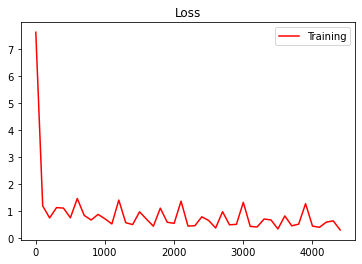

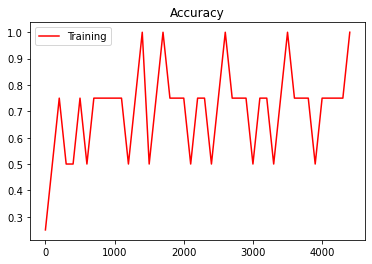

In [16]:
fig = plt.figure()
plt.plot(train_log['iter'], train_log['loss'], 'r', label='Training')
plt.title('Loss')
plt.legend()
fig = plt.figure()
plt.plot(train_log['iter'], train_log['accuracy'], 'r', label='Training')
plt.title('Accuracy')
plt.legend()
plt.show()

In [17]:
def test(model, device, test_loader):
    """Evaluate model on test dataset."""
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.reshape([1,1,28,28])  
            data = Variable(data)
            data, target = data.to(device), target.to(device)
            output = model(data.float())
            test_loss += F.cross_entropy(output, target.long(), reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    return test_loss, correct / len(test_loader.dataset)

In [18]:
test(net, device, testloader)


Test set: Average loss: 0.5378, Accuracy: 327/400 (82%)



(0.5377677457749133, 0.8175)

In [19]:
# SVM stuff
svmCLF = SVC()
svmCLF.fit(x_train, y_train)

SVC()

In [20]:
y_pred = svmCLF.predict(x_test)

In [49]:
from sklearn.decomposition import PCA

# Calculate means
x_train_mean = x_train.mean(axis=0)
x_train_nm = x_train - x_train_mean

# Initialize PCA object
pca = PCA(n_components=2)

# Fit PCA to normalized data with no components
Z = pca.fit_transform(x_train_nm)

# Principal Components
V = pca.components_

# First and second PC
Z_x = Z[0]
Z_y = Z[1]

# Standard deviations of both components
std_x = np.std(Z_x)
std_y = np.std(Z_y)

# Grid parameters
x_min, x_max = -5*std_x, 5*std_x
y_min, y_max = -5*std_y, 5*std_y
x_step = std_x/10
y_step = std_y/10

xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Projected points into PC plane
z = np.c_[xx.ravel(), yy.ravel()]

# Revert projection
x = np.dot(z,V)


In [50]:
predictions = svmCLF.predict(x)
predictions = predictions.reshape(xx.shape)

/local_scratch/pbs.4952583.pbs02/ipykernel_3381028/3537271200.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),


Text(0.5, 1.0, 'Decision surface of Support Vector Machine')

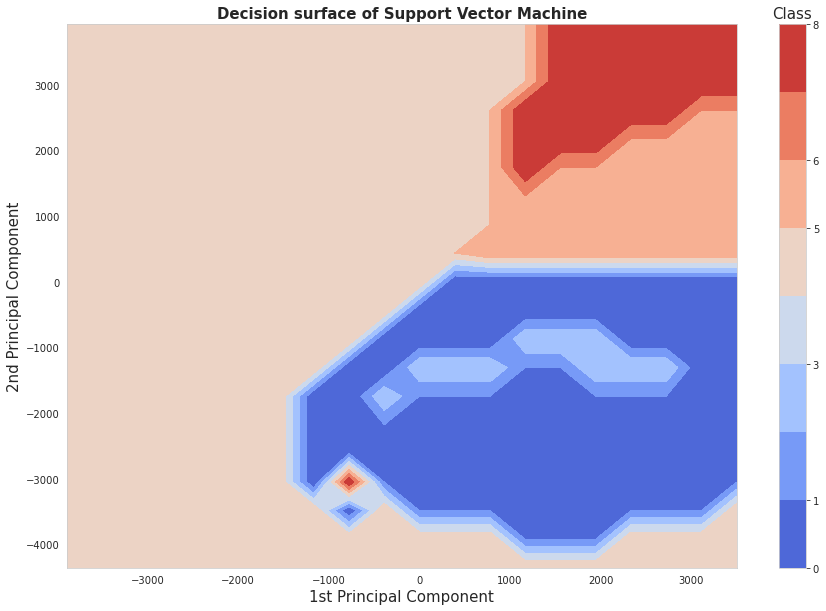

In [23]:
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),
                        ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('1st Principal Component', fontsize = 15)
plt.ylabel('2nd Principal Component', fontsize = 15)
plt.title("Decision surface of Support Vector Machine", fontweight = 'bold', fontsize=15)

In [24]:
print(f"SVM Model Accuracy:{svmCLF.score(x_test, y_test)}")

SVM Model Accuracy:0.8425


In [25]:
np.random.seed(8675309)
gauss_noise = np.random.normal(0,10, (400, 784))
x_test_gauss = x_test + gauss_noise
x_test_speckle = x_test + x_test*gauss_noise*0.05 

In [26]:
gaussloader  = DataLoader(FMNISTDatapy(x_test_gauss,y_test,train=False))
speckleloader  = DataLoader(FMNISTDatapy(x_test_speckle,y_test,train=False))

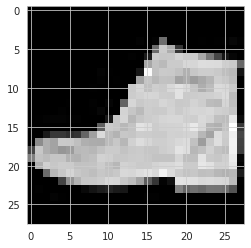

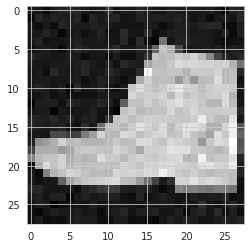

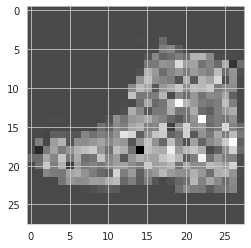

In [27]:
imc = 2
plt.imshow(x_test[imc,:].reshape(28,28), cmap = 'gray')
plt.show()
plt.imshow(x_test_gauss[imc,:].reshape(28,28), cmap = 'gray')
plt.show()
plt.imshow(x_test_speckle[imc,:].reshape(28,28), cmap = 'gray')
plt.show()

In [28]:
y_pred_gauss = svmCLF.predict(x_test_gauss)
print(f"SVM Model Accuracy:{svmCLF.score(x_test_gauss, y_test)}")

SVM Model Accuracy:0.84


In [29]:
y_pred_speckle = svmCLF.predict(x_test_speckle)
print(f"SVM Model Accuracy:{svmCLF.score(x_test_speckle, y_test)}")

SVM Model Accuracy:0.8325


In [30]:
gaussloader  = DataLoader(FMNISTDatapy(x_test_gauss,y_test,train=False))
speckleloader  = DataLoader(FMNISTDatapy(x_test_speckle,y_test,train=False))

In [31]:
test(net, device, gaussloader)


Test set: Average loss: 0.5566, Accuracy: 324/400 (81%)



(0.5565934679104976, 0.81)

In [32]:
test(net, device, speckleloader)


Test set: Average loss: 0.9792, Accuracy: 259/400 (65%)



(0.9792014974408733, 0.6475)

In [33]:
# SVM stuff
#from sklearn.svm import LinearSVC
rbfCLF = SVC(kernel='rbf')
rbfCLF.fit(x_train, y_train)

SVC()

In [34]:
y_pred_rbf = rbfCLF.predict(x_test)
print(f"SVM Model Accuracy:{rbfCLF.score(x_test, y_test)}")

SVM Model Accuracy:0.8425


In [35]:
y_pred_rbfg = rbfCLF.predict(x_test_gauss)
print(f"SVM Model Accuracy:{rbfCLF.score(x_test_gauss, y_test)}")

SVM Model Accuracy:0.84


In [36]:
y_pred_rbfs = rbfCLF.predict(x_test_speckle)
print(f"SVM Model Accuracy:{rbfCLF.score(x_test_speckle, y_test)}")

SVM Model Accuracy:0.8325


In [37]:
from mpl_toolkits.axes_grid1 import ImageGrid

In [38]:
polyCLF = SVC(kernel='poly')
polyCLF.fit(x_train, y_train)

SVC(kernel='poly')

In [39]:
y_pred_poly = polyCLF.predict(x_test)
print(f"SVM Model Accuracy:{polyCLF.score(x_test, y_test)}")

SVM Model Accuracy:0.78


In [40]:
y_pred_polyg = polyCLF.predict(x_test_gauss)
print(f"SVM Model Accuracy:{polyCLF.score(x_test_gauss, y_test)}")

SVM Model Accuracy:0.7775


In [41]:
y_pred_polys = polyCLF.predict(x_test_speckle)
print(f"SVM Model Accuracy:{polyCLF.score(x_test_speckle, y_test)}")

SVM Model Accuracy:0.7525


In [42]:
linCLF = SVC(kernel='linear')
linCLF.fit(x_train, y_train)

SVC(kernel='linear')

In [43]:
y_pred_lin = linCLF.predict(x_test)
print(f"SVM Model Accuracy:{linCLF.score(x_test, y_test)}")

SVM Model Accuracy:0.815


In [44]:
y_pred_ling = linCLF.predict(x_test_gauss)
print(f"SVM Model Accuracy:{linCLF.score(x_test_gauss, y_test)}")

SVM Model Accuracy:0.815


In [45]:
y_pred_lins = linCLF.predict(x_test_speckle)
print(f"SVM Model Accuracy:{linCLF.score(x_test_speckle, y_test)}")

SVM Model Accuracy:0.735


In [46]:
print(net)

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (nonlinear): ReLU()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Sequential(
    (0): Linear(in_features=3136, out_features=128, bias=True)
    (1): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


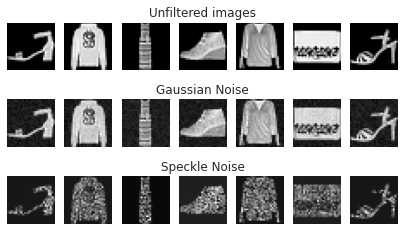

In [47]:
fig, axes = plt.subplots(3,7, figsize=(7,4))
axes = axes.ravel()
for i in range(7):
    axes[i].imshow(x_test[i+11,:].reshape(28,28), cmap = 'gray')
    axes[i+7].imshow(x_test_gauss[i+11,:].reshape(28,28), cmap = 'gray')
    axes[i+14].imshow(x_test_speckle[i+11,:].reshape(28,28), cmap = 'gray')
    axes[3].set_title("Unfiltered images")
    axes[10].set_title("Gaussian Noise")
    axes[17].set_title("Speckle Noise")
    axes[i].axis('off')
    axes[i+7].axis('off')
    axes[i+14].axis('off')
plt.savefig('common_labels.png', dpi=300)

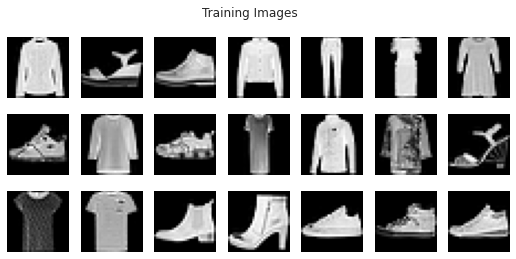

In [48]:
fig, axes = plt.subplots(3,7, figsize=(9,4))
axes = axes.ravel()
for i in range(21):
    axes[i].imshow(x_train[i+11,:].reshape(28,28), cmap = 'gray')
    axes[i].axis('off')
plt.suptitle("Training Images")
plt.savefig('train.png', dpi=300)

In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"kernel": ["poly"], "degree": [2, 3, 4], 'C': [1, 2, 5, 10, 20]},
    {"kernel": ["rbf"], 'C': [1, 2, 5, 10, 20]}
]
svc = SVC(random_state=42)
search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=8)
search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=8,
             param_grid=[{'C': [1, 2, 5, 10, 20], 'degree': [2, 3, 4],
                          'kernel': ['poly']},
                         {'C': [1, 2, 5, 10, 20], 'kernel': ['rbf']}])

In [65]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
5_rbf,"{'C': 5, 'kernel': 'rbf'}",1,0.845278,0.003216
20_rbf,"{'C': 20, 'kernel': 'rbf'}",2,0.840000,0.003118
10_rbf,"{'C': 10, 'kernel': 'rbf'}",3,0.839444,0.003492
2_rbf,"{'C': 2, 'kernel': 'rbf'}",4,0.836389,0.002390
5_2_poly,"{'C': 5, 'degree': 2, 'kernel': 'poly'}",5,0.823056,0.006713
10_2_poly,"{'C': 10, 'degree': 2, 'kernel': 'poly'}",6,0.822222,0.006174
1_rbf,"{'C': 1, 'kernel': 'rbf'}",7,0.821944,0.004631
20_2_poly,"{'C': 20, 'degree': 2, 'kernel': 'poly'}",8,0.820556,0.004157
2_2_poly,"{'C': 2, 'degree': 2, 'kernel': 'poly'}",9,0.815556,0.006174


In [66]:
bestCLF = SVC(kernel='rbf', C=5)
bestCLF.fit(x_train, y_train)

SVC(C=5)

In [72]:
y_pred_b = bestCLF.predict(x_test)
print(f"SVM Model Accuracy:{bestCLF.score(x_test, y_test)}")

SVM Model Accuracy:0.8675


In [69]:
y_pred_bg = bestCLF.predict(x_test_gauss)
print(f"SVM Model Accuracy:{bestCLF.score(x_test_gauss, y_test)}")

SVM Model Accuracy:0.865


In [70]:
y_pred_bs = bestCLF.predict(x_test_speckle)
print(f"SVM Model Accuracy:{bestCLF.score(x_test_speckle, y_test)}")

SVM Model Accuracy:0.79


In [76]:
from sklearn.decomposition import PCA

# Calculate means
x_train_mean = x_train.mean(axis=0)
x_train_nm = x_train - x_train_mean

# Initialize PCA object
pca = PCA(n_components=2)

# Fit PCA to normalized data with no components
Z = pca.fit_transform(x_train_nm)

# Principal Components
V = pca.components_

# First and second PC
Z_x = Z[0]
Z_y = Z[1]

# Standard deviations of both components
std_x = np.std(Z_x)
std_y = np.std(Z_y)

# Grid parameters
x_min, x_max = -5*std_x, 5*std_x
y_min, y_max = -5*std_y, 5*std_y
x_step = std_x/20
y_step = std_y/20

xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Projected points into PC plane
z = np.c_[xx.ravel(), yy.ravel()]

# Revert projection
x = np.dot(z,V)


In [77]:
predictions = bestCLF.predict(x)
predictions = predictions.reshape(xx.shape)

/local_scratch/pbs.4952583.pbs02/ipykernel_3381028/66821321.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),


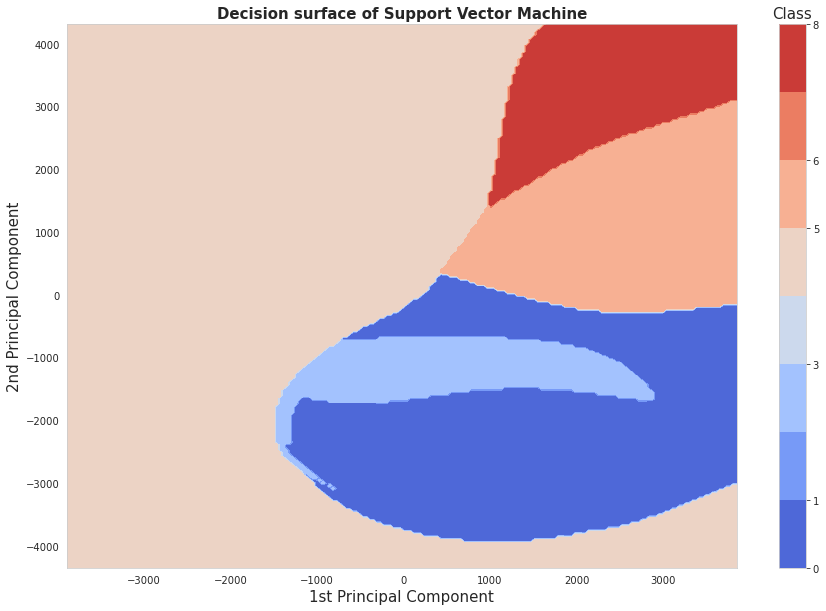

In [79]:
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),
                        ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('1st Principal Component', fontsize = 15)
plt.ylabel('2nd Principal Component', fontsize = 15)
plt.title("Decision surface of Support Vector Machine", fontweight = 'bold', fontsize=15)
plt.savefig("small-setSVM.png")